### k-nearest neighbors

 - a supervised learning algorithm
 - Intuition: predict the label of a data point by looking at its closest k labeled data points, then take a "majority vote" to determine what label the unlabeled data point should have
 - Can be used for classification (where the outcome is a class) or regression (where the outcome is a value, e.g. the average of the nearest k data points' values)
 - It relies on calculating the distance between data points so features must be normalised and not have vastly different physical units/scales
      - Scaling options include: min-max, standardisation, median-MAD, mapping to an arbitrary function such sigmoid or tahn
 - The kNN algorithm creates decision boundaries on the data, so data points within the a boundary are of the same class
 - A larger k would result in a much smoother decision boundary (i.e. better ability to generalise to new data) and a less complex model. In contrast, a smaller k would result in a much curvier decision boundary (i.e. better ability to classify the existing data correctly) but is prone to overfitting due to noise in the data (so less capable of classifying new data correctly)
 - Usually there will be a k that is optimal in the sense that it does well both in the training and the testing set, avoiding over and under fitting
 - Learn more: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


In [14]:
wines = load_wine()
features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])
features.shape

(178, 13)

In [15]:
target = pd.DataFrame(wines['target'], columns=['Type'])
target.shape

(178, 1)

In [16]:
df = pd.concat([target,features],axis=1)
df.shape

(178, 14)

In [17]:
# Create arrays for the features and the response variable
y = target.values.reshape(-1)
X = features.values

# Create X_new for prediction
X_new = pd.DataFrame(data=[12,2,3,12,140,3,2,0.2,2,3,4,1,3],index=df.iloc[0,1:].index)

# display(y)
# display(X)
# display(X_new.values.reshape(1,-1))

In [7]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6,)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new

new_prediction = knn.predict(X_new.values.reshape(1,-1))
print("Prediction: {}".format(new_prediction))


Prediction: [1]


#### Creating training and testing sets
   
   - stratify = performs a split that best reflects the labels on your data if you use the target array (i.e. the labels should be distributed in train and tests sets as they are in the original data)
   - random_state = a seed that you can use later to reproduce the exact same split


#### Accuracy
   - it's the fraction of correct predictions, true positive / total number of data points
   - accuracy would be 100% if you set k = 1 and computed it against the training set
   - the accuracy of the fitted model should be computed on new data (i.e. the test set)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [9]:
help(knn.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for `X`.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of ``self.predict(X)`` wrt. `y`.



In [10]:
# Print the accuracy
print(knn.score(X_test,y_test))

0.7407407407407407


In [11]:
plot_df = pd.DataFrame([y_pred,y_test],index=['Prediction','Class']).T

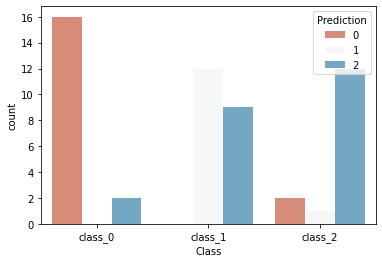

In [12]:
plt.figure()
sns.countplot(x='Class', hue='Prediction', data=plot_df, palette='RdBu')
plt.xticks([0,1,2], ['class_0', 'class_1', 'class_2'])
plt.show()

### Regression - predict alcohol level in wine

In [49]:
all_features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])
target = pd.DataFrame(all_features['alcohol'])
features = all_features.drop('alcohol',axis=1)

# Create arrays for the features and the response variable
y = target.values.reshape(-1)
X = features.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.35,
                                                    random_state=21)



In [52]:
for n in range(2, 21):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(X_train,y_train)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(X_train, y_train))
    print(knn.score(X_test, y_test),"\n")

n_neighbors = 2
train, test scores
0.8521584027126278
0.47718997110682115 

n_neighbors = 3
train, test scores
0.7477703923487495
0.5329481038214019 

n_neighbors = 4
train, test scores
0.7032524633190038
0.55308596844677 

n_neighbors = 5
train, test scores
0.6435093130972963
0.5347111979839354 

n_neighbors = 6
train, test scores
0.6589916988265845
0.522180134185967 

n_neighbors = 7
train, test scores
0.6430226004226277
0.5245796834122953 

n_neighbors = 8
train, test scores
0.6341768974391657
0.5496984196232919 

n_neighbors = 9
train, test scores
0.6341732067116652
0.5444656365178417 

n_neighbors = 10
train, test scores
0.6188644113843893
0.5560124091429872 

n_neighbors = 11
train, test scores
0.5943331263709977
0.566407807173825 

n_neighbors = 12
train, test scores
0.5796613507987587
0.5681924845252633 

n_neighbors = 13
train, test scores
0.5819099125326768
0.5702353293617157 

n_neighbors = 14
train, test scores
0.5732545811733645
0.5604728189726271 

n_neighbors = 15
train,

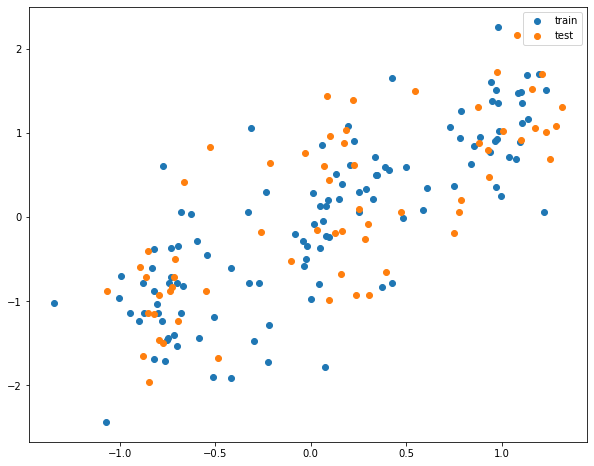

In [54]:
# Create the model with the best-performing n_neighbors
knn = KNeighborsRegressor(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

# Get predictions for train and test sets
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10,8))
plt.scatter(train_predictions, y_train, label='train')
plt.scatter(test_predictions, y_test, label='test')
plt.legend()
plt.show()